## Task 1 (The two-component system)

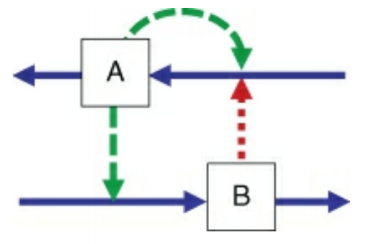

### (d)



In [2]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import odeint

Text(0, 0.5, 'y')

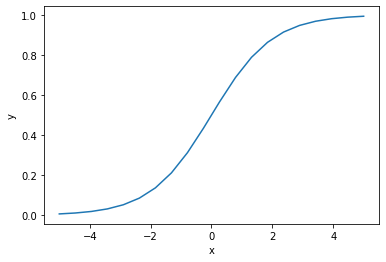

In [22]:
def sig(B):
    return 1/(1+np.power(np.e,-B))

x = np.linspace(-5,5,20)
plt.plot(x,sig(x))
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'act(B)')

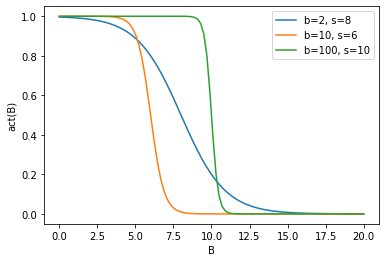

In [31]:
def act(B,b,s):
    return 1-(1/(1+np.power(b,-B+s)))


x = np.linspace(0,20,100)
plt.plot(x,act(x,2,8), label="b=2, s=8")
plt.plot(x,act(x,10,6), label="b=10, s=6")
plt.plot(x,act(x,100,10), label="b=100, s=10")
plt.legend(loc='best')

plt.xlabel("B")
plt.ylabel("act(B)")

In [57]:
def X(v,t, a1, a2, b, s):
    A, B = v
    
    dAdt = a1*A*act(B,b,s) - 0.2*A

    dBdt = a2*A - 0.4*B
    dAdt = dAdt if A+dAdt > 0 else 0
    dBdt = dBdt if B+dBdt > 0 else 0

    dvdt = [dAdt,dBdt]
    return dvdt

[5.00129117 2.50229821]


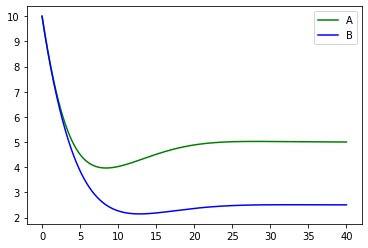

In [68]:
v0 = [10,10]

t = np.linspace(0,40,2000)

p0 = (.4,.2, 2, 2.5)
solution = odeint(X, v0, t, args=p0)

plt.plot(t,solution[:,0], label=r"A", c="green")
plt.plot(t,solution[:,1], label=r"B", c="blue")

endpoint=solution[-1,:]
print(endpoint)
plt.legend(loc='best')

[5.0039589 2.5007629]


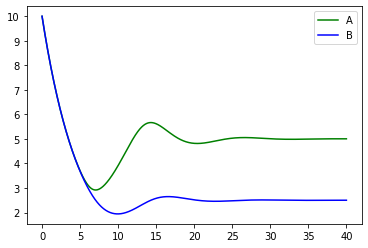

In [72]:
v0 = [10,10]

t = np.linspace(0,40,2000)

p0 = (.4,.2, 20, 2.5)
solution = odeint(X, v0, t, args=p0)

plt.plot(t,solution[:,0], label=r"A", c="green")
plt.plot(t,solution[:,1], label=r"B", c="blue")

endpoint=solution[-1,:]
print(endpoint)
plt.legend(loc='best')

Text(0, 0.5, 'act(B)')

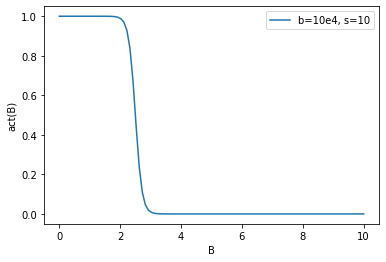

In [74]:
x = np.linspace(0,10,100)
plt.plot(x,act(x,10000,2.5), label="b=10e4, s=10")
plt.legend(loc='best')

plt.xlabel("B")
plt.ylabel("act(B)")

[5.00474872 2.50054459]


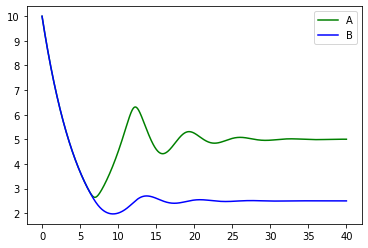

In [81]:
v0 = [10,10]

t = np.linspace(0,40,2000)

p0 = (.4,.2, 10000, 2.5)
solution = odeint(X, v0, t, args=p0)

plt.plot(t,solution[:,0], label=r"A", c="green")
plt.plot(t,solution[:,1], label=r"B", c="blue")

endpoint=solution[-1,:]
print(endpoint)
plt.legend(loc='best')

Text(0, 0.5, 'B')

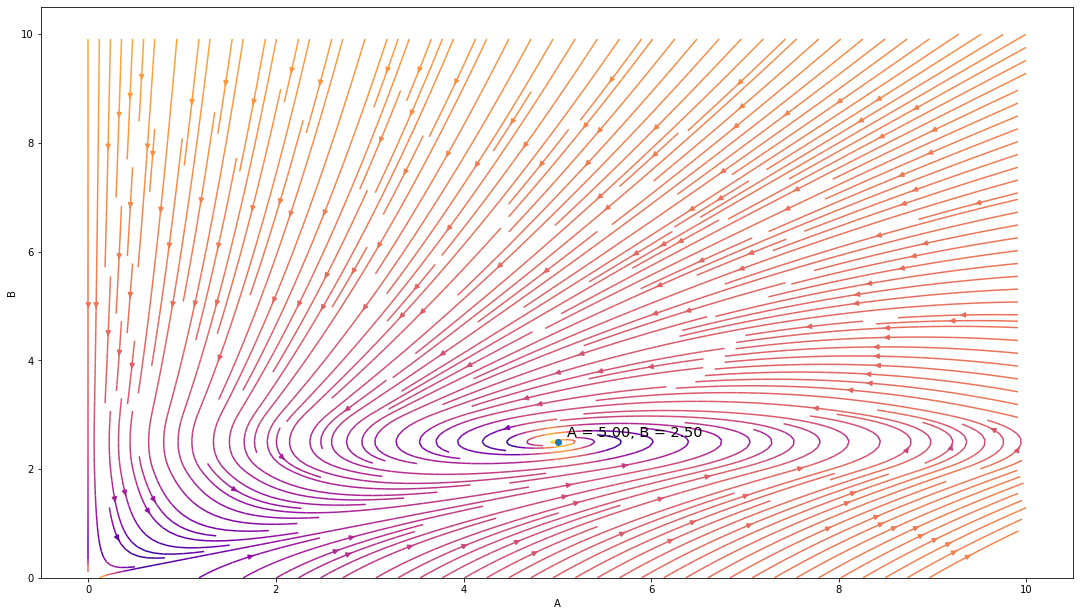

In [82]:
A,B = np.meshgrid(np.linspace(0,10,21), np.linspace(0,10,21))

V = np.dstack((A,B))
s=0.1
M = []
for row in V:
    nrow = []
    for pair in row:
        dXdt = s*np.array(X(pair,0,*p0))
        #dXdt = dXdt if np.dot(dXdt, dXdt) < 1 else dXdt/np.dot(dXdt,dXdt)
        nrow.append(np.concatenate((dXdt,[np.dot(dXdt, dXdt)])))
    M.append(nrow)
M = np.array(M)

dA = M[:,:,0]
dB = M[:,:,1]
mag = ma.log(M[:,:,2]).filled(0)

fig1, ax1 = plt.subplots()
plt.streamplot(A, B, dA, dB, density=3, color=mag, cmap="plasma")

#Q = ax1.quiver(A, B, dA, dB, pivot='mid')
fig = plt.gcf()
plt.scatter(endpoint[0],endpoint[1],zorder=1000)
plt.annotate("A = {0:.2f}, B = {1:.2f}".format(endpoint[0],endpoint[1]),endpoint+0.1,size="x-large")
fig.set_size_inches(18.5, 10.5)

plt.xlabel("A")
plt.ylabel("B")

Text(0, 0.5, 'act(B)')

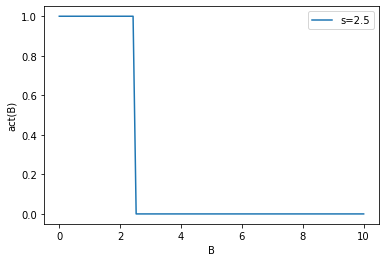

In [86]:
def step(x,s):
    return np.where(x<s,1,0)
 

x = np.linspace(0,10,100)
plt.plot(x,step(x,2.5), label="s=2.5")
plt.legend(loc='best')

plt.xlabel("B")
plt.ylabel("step(B)")

[4.9809194  2.49988404]


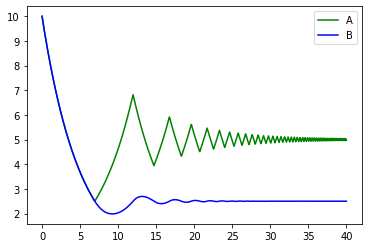

In [89]:
def X2(v,t, a1, a2, s):
    A, B = v
    
    dAdt = a1*A*step(B,s) - 0.2*A

    dBdt = a2*A - 0.4*B
    dAdt = dAdt if A+dAdt > 0 else 0
    dBdt = dBdt if B+dBdt > 0 else 0

    dvdt = [dAdt,dBdt]
    return dvdt

v0 = [10,10]

t = np.linspace(0,40,2000)

p0 = (.4,.2, 2.5)
solution = odeint(X2, v0, t, args=p0)

plt.plot(t,solution[:,0], label=r"A", c="green")
plt.plot(t,solution[:,1], label=r"B", c="blue")

endpoint=solution[-1,:]
print(endpoint)
plt.legend(loc='best')

Text(0, 0.5, 'B')

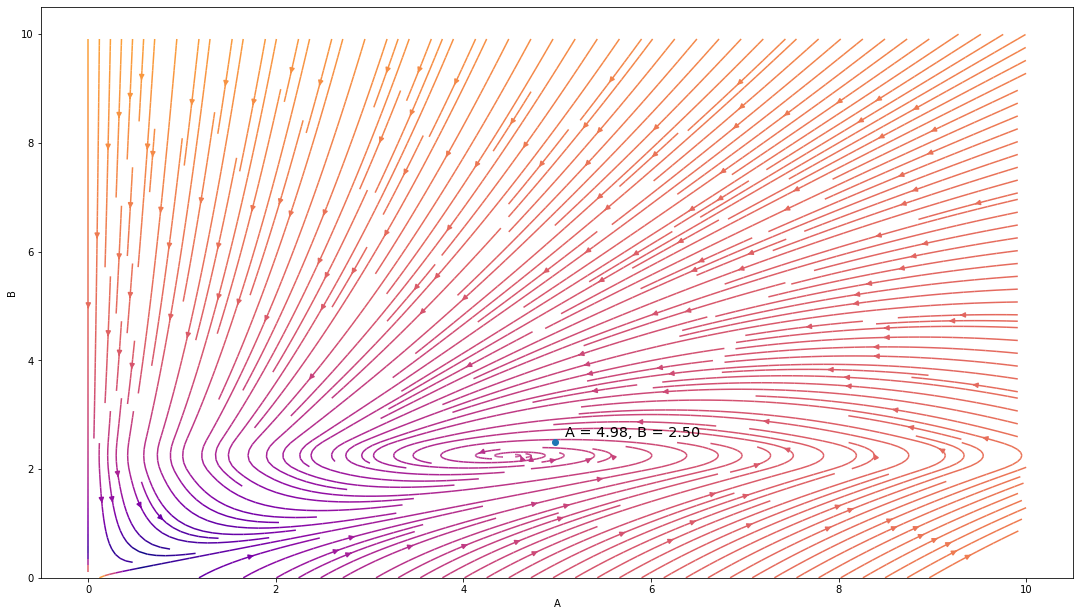

In [91]:
A,B = np.meshgrid(np.linspace(0,10,21), np.linspace(0,10,21))

V = np.dstack((A,B))
s=0.1
M = []
for row in V:
    nrow = []
    for pair in row:
        dXdt = s*np.array(X2(pair,0,*p0))
        #dXdt = dXdt if np.dot(dXdt, dXdt) < 1 else dXdt/np.dot(dXdt,dXdt)
        nrow.append(np.concatenate((dXdt,[np.dot(dXdt, dXdt)])))
    M.append(nrow)
M = np.array(M)

dA = M[:,:,0]
dB = M[:,:,1]
mag = ma.log(M[:,:,2]).filled(0)

fig1, ax1 = plt.subplots()
plt.streamplot(A, B, dA, dB, density=3, color=mag, cmap="plasma")

#Q = ax1.quiver(A, B, dA, dB, pivot='mid')
fig = plt.gcf()
plt.scatter(endpoint[0],endpoint[1],zorder=1000)
plt.annotate("A = {0:.2f}, B = {1:.2f}".format(endpoint[0],endpoint[1]),endpoint+0.1,size="x-large")
fig.set_size_inches(18.5, 10.5)

plt.xlabel("A")
plt.ylabel("B")